In [1]:
import torch
import torch_geometric
import numpy as np
import pandas as pd
import os
import datasets
from collections import defaultdict
from measures import get_average_accuracy, get_average_forgetting_measure

In [2]:
from torch_geometric.data import Data
from torch_geometric.loader import NeighborLoader
from torch_geometric.data import Data

import torch.nn.functional as F
from torch_geometric.nn import GCNConv

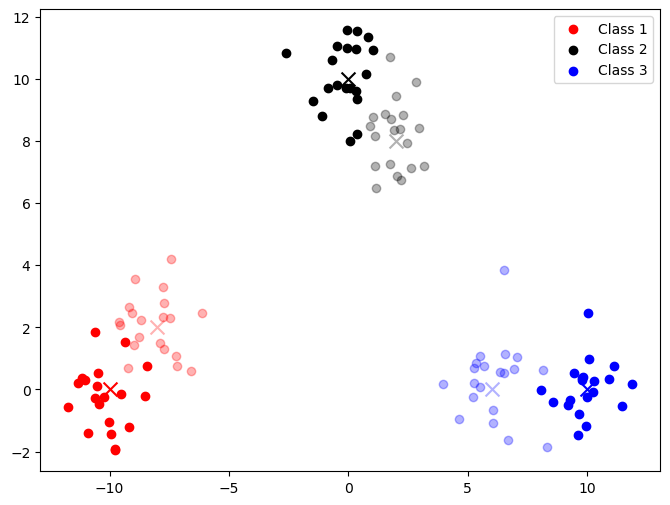

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Define means for three normal distributions
means = [(-10, 0), (0, 10), (10, 0)]
cov = [[1, 0], [0, 1]]  # Identity matrix for simplicity

# Generate points for each original distribution
points1 = np.random.multivariate_normal(means[0], cov, 20)
points2 = np.random.multivariate_normal(means[1], cov, 20)
points3 = np.random.multivariate_normal(means[2], cov, 20)

# Define means for the blurred distributions, close to the original means
blurred_means = [(-8, 2), (2, 8), (6, 0)]
blurred_cov = [[1, 0], [0, 1]]  # Increased variance for blurring effect

# Generate points for each blurred distribution
blurred_points1 = np.random.multivariate_normal(blurred_means[0], blurred_cov, 20)
blurred_points2 = np.random.multivariate_normal(blurred_means[1], blurred_cov, 20)
blurred_points3 = np.random.multivariate_normal(blurred_means[2], blurred_cov, 20)

# Plot the points
plt.figure(figsize=(8, 6))

# Original distributions
plt.scatter(points1[:, 0], points1[:, 1], c='r', label='Class 1')
plt.scatter(points2[:, 0], points2[:, 1], c='black', label='Class 2')
plt.scatter(points3[:, 0], points3[:, 1], c='b', label='Class 3')

# Blurred distributions
plt.scatter(blurred_points1[:, 0], blurred_points1[:, 1], c='r', alpha=0.3)
plt.scatter(blurred_points2[:, 0], blurred_points2[:, 1], c='black', alpha=0.3)
plt.scatter(blurred_points3[:, 0], blurred_points3[:, 1], c='b', alpha=0.3)

# Plot the means of original distributions
plt.scatter(*means[0], c='r', marker='x', s=100)
plt.scatter(*means[1], c='black', marker='x', s=100)
plt.scatter(*means[2], c='b', marker='x', s=100)

# Plot the means of blurred distributions
plt.scatter(*blurred_means[0], c='r', marker='x', s=100, alpha=0.3)
plt.scatter(*blurred_means[1], c='black', marker='x', s=100, alpha=0.3)
plt.scatter(*blurred_means[2], c='b', marker='x', s=100, alpha=0.3)

plt.legend()
plt.axis()

# Show the plot
plt.savefig('feature_shift_example.pdf')
plt.show()


In [9]:
from csbm import MultiClassCSBM

In [26]:
csbm = MultiClassCSBM(n=1)
mu1 = csbm.means[0].reshape(-1,1)
mu2 = csbm.means[1].reshape(-1,1)
cov = 0.1 * np.eye(128)

In [36]:
delta = ((mu1 - mu2).T @ np.linalg.inv(cov) @ (mu1 - mu2)) ** 0.5
delta

array([[4.47213595]])

In [37]:
from scipy.stats import norm

In [38]:
0.5 * norm.cdf(-0.5 * delta)

array([[0.00633683]])